# Import Library

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore", category=FutureWarning)

# Load Dataset , Prepocessing, dan EDA

In [60]:
data_MallCus = pd.read_csv('Mall_Customers.csv')
data_MallCus

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [61]:
data_MallCus .head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [62]:
data_MallCus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [63]:
data_MallCus.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


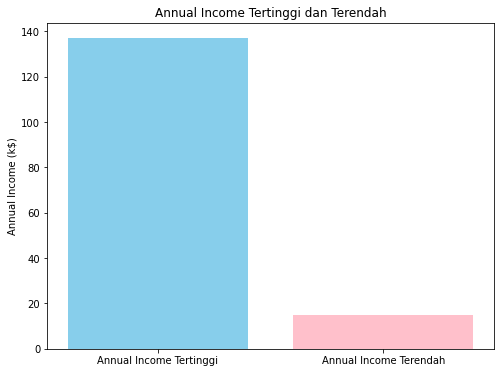

In [65]:
# Membuat bar chart untuk distribusi Annual Income
plt.figure(figsize=(8, 6))
plt.bar(['Annual Income Tertinggi', 'Annual Income Terendah'], [income_max, income_min], color=['skyblue', 'pink'])
plt.title('Annual Income Tertinggi dan Terendah')
plt.ylabel('Annual Income (k$)')
plt.show()

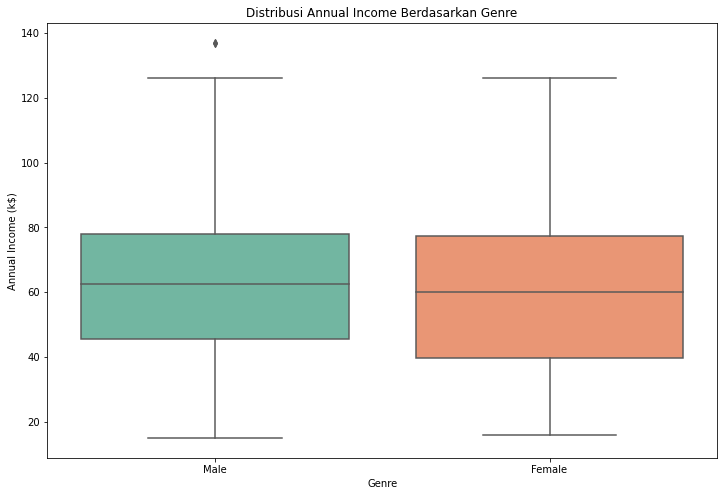

In [128]:
# Visualisasi distribusi Annual Income berdasarkan genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Annual Income (k$)', data=data, palette='Set2')
plt.title('Distribusi Annual Income Berdasarkan Genre')
plt.xlabel('Genre')
plt.ylabel('Annual Income (k$)')
plt.show()

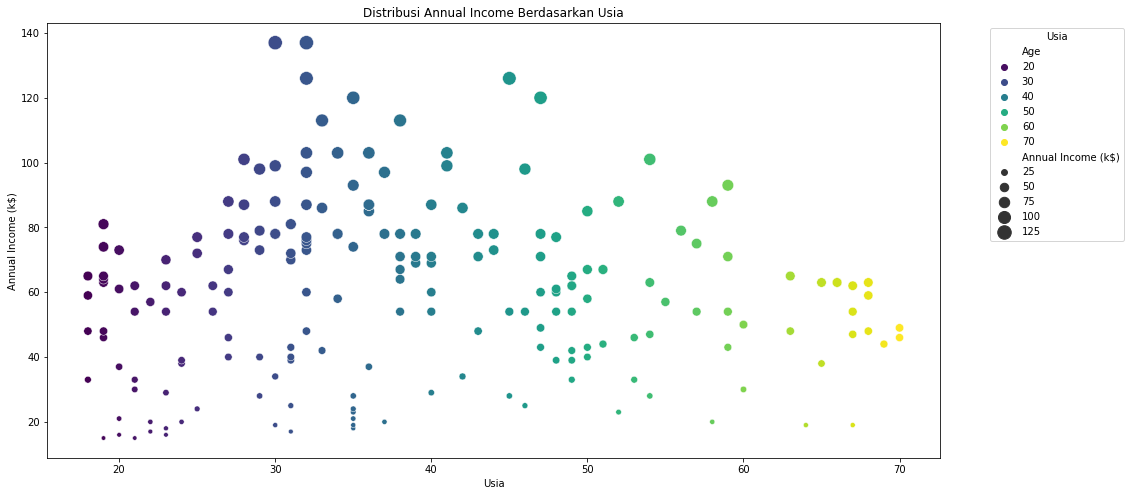

In [129]:
# Visualisasi distribusi Annual Income berdasarkan usia
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, hue='Age', palette='viridis', size='Annual Income (k$)', sizes=(20, 200))
plt.title('Distribusi Annual Income Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Usia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [66]:
data_MallCus.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [67]:
data_MallCus['Annual Income (k$)'].nunique()

64

Mengecek Outlier pada data aslinya

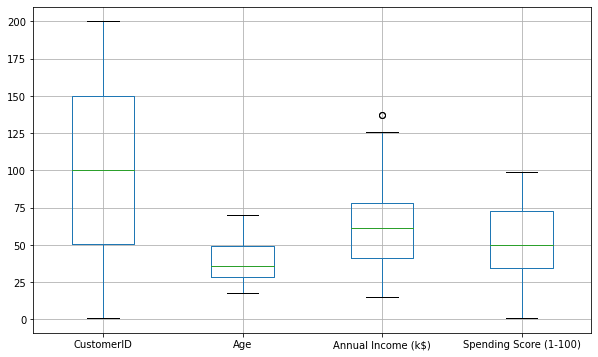

In [68]:
plt.figure(figsize=(10,6))
data_MallCus.boxplot()
plt.show()

# Memisahkan Gender agar bisa di Standarisasi

In [69]:
# Memisahkan data menjadi dua kelompok: male dan female
male_data = data_MallCus[data_MallCus['Genre'] == 'Male']
print("Male Data:")
print(male_data)

Male Data:
     CustomerID Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1  Male   19                  15                      39
1             2  Male   21                  15                      81
8             9  Male   64                  19                       3
10           11  Male   67                  19                      14
14           15  Male   37                  20                      13
..          ...   ...  ...                 ...                     ...
187         188  Male   28                 101                      68
192         193  Male   33                 113                       8
197         198  Male   32                 126                      74
198         199  Male   32                 137                      18
199         200  Male   30                 137                      83

[88 rows x 5 columns]


In [70]:
female_data = data_MallCus[data_MallCus['Genre'] == 'Female']
print("\nFemale Data:")
print(female_data)


Female Data:
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
..          ...     ...  ...                 ...                     ...
191         192  Female   32                 103                      69
193         194  Female   38                 113                      91
194         195  Female   47                 120                      16
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28

[112 rows x 5 columns]


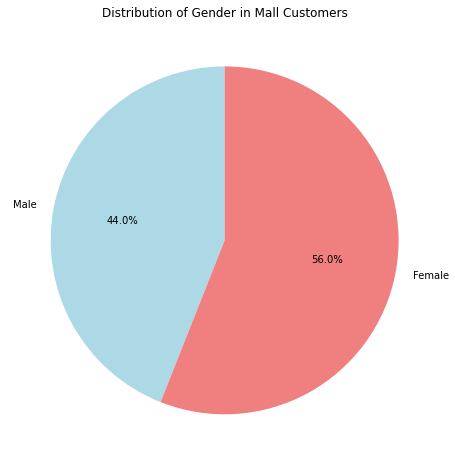

In [72]:
# Memisahkan data menjadi dua kelompok: male dan female
male_data = data_MallCus[data_MallCus['Genre'] == 'Male']
female_data = data_MallCus[data_MallCus['Genre'] == 'Female']

# Menghitung frekuensi male dan female
male_count = len(male_data)
female_count = len(female_data)

# Membuat pie chart
labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender in Mall Customers')

plt.show()

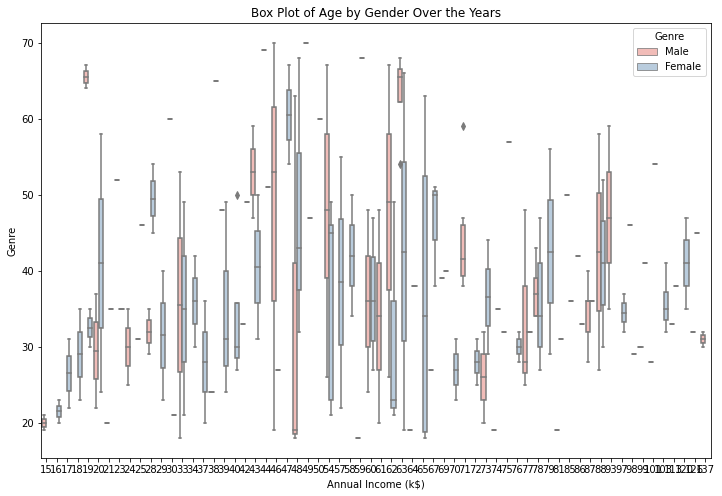

In [108]:
# Membuat box plot untuk usia (age) dan jenis kelamin (genre)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Annual Income (k$)', y='Age', hue='Genre', data=data, palette='Pastel1')

# Menambahkan judul dan label sumbu
plt.title('Box Plot of Age by Gender Over the Years')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Genre')
plt.show()

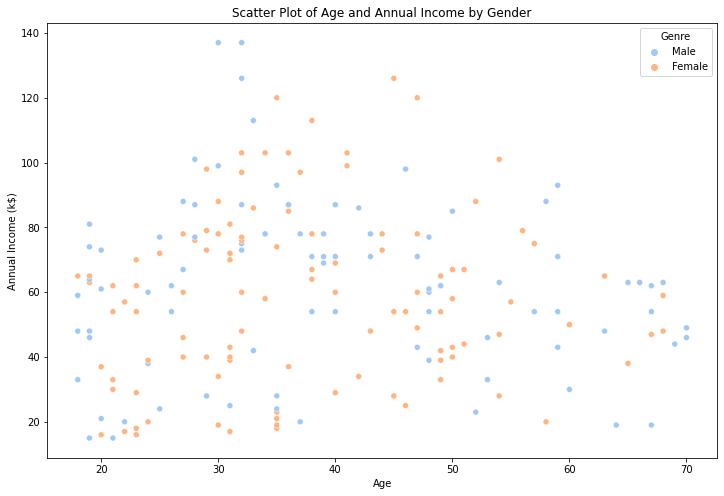

In [109]:
# Membuat scatter plot untuk Age dan Annual Income berdasarkan jenis kelamin
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Genre', data=data, palette='pastel')

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot of Age and Annual Income by Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

plt.show()

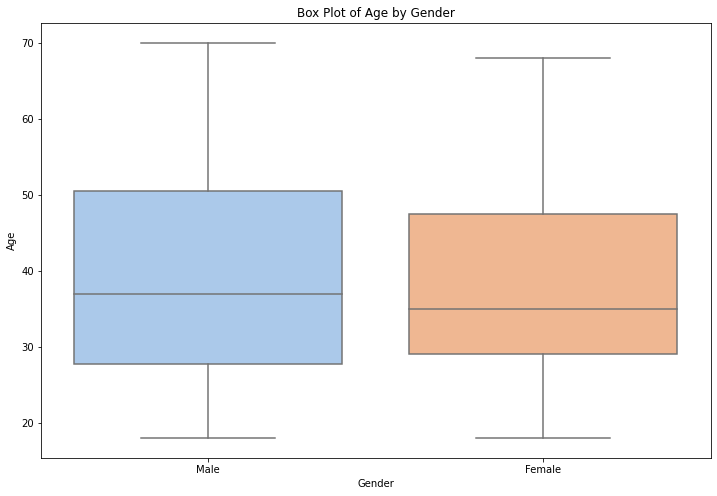

In [110]:
# Membuat box plot untuk umur dan jenis kelamin
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Age', data=data, palette='pastel')

# Menambahkan judul dan label sumbu
plt.title('Box Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

# Menampilkan box plot
plt.show()

# Perform preprocessing steps on the dataset to create dummy variables

In [76]:
y = data_MallCus['Annual Income (k$)']

In [90]:
# Lakukan encoding dan imputasi
label_encoder = LabelEncoder()
data_encoded = data.apply(lambda col: label_encoder.fit_transform(col.astype(str)) if col.dtype == 'O' else col)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_encoded)

# Standarisasi menggunakan StandardScaler
std = StandardScaler()
X_std = std.fit_transform(data_imputed)

# Membuat DataFrame hasil standarisasi
X_std_df = pd.DataFrame(X_std, columns=data.columns)

# Melihat hasil standarisasi
print(X_std_df.head())

   CustomerID     Genre       Age  Annual Income (k$)  Spending Score (1-100)
0   -1.723412  1.128152 -1.424569           -1.738999               -0.434801
1   -1.706091  1.128152 -1.281035           -1.738999                1.195704
2   -1.688771 -0.886405 -1.352802           -1.700830               -1.715913
3   -1.671450 -0.886405 -1.137502           -1.700830                1.040418
4   -1.654129 -0.886405 -0.563369           -1.662660               -0.395980


Mengubah Gender menjadi Numerik

In [106]:
# Assuming 'X' is a pandas DataFrame
std = StandardScaler()
X_std = std.fit_transform(data_imputed)

In [107]:
df = pd.get_dummies(data) # kolom kategorik dibuat numerik dengan cara di dummy
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [100]:
std = StandardScaler()
X_std = std.fit_transform(data_imputed)
X_std

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

In [102]:
cols = data.columns

In [103]:
X_std = pd.DataFrame(X_std, columns=[cols])
X_std.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


In [122]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
data_MallCus_preprocessed = pd.DataFrame(data=X, columns=df.columns)
data_MallCus_preprocessed.head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,-1.723412,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,0.886405,-0.886405
5,-1.636808,-1.209269,-1.662660,1.001596,0.886405,-0.886405
6,-1.619488,-0.276302,-1.624491,-1.715913,0.886405,-0.886405
7,-1.602167,-1.137502,-1.624491,1.700384,0.886405,-0.886405
8,-1.584846,1.804932,-1.586321,-1.832378,-1.128152,1.128152
9,-1.567526,-0.635135,-1.586321,0.846310,0.886405,-0.886405


# PCA

In [123]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(data_MallCus_preprocessed)
dfx_pca.explained_variance_ratio_
pca = PCA(n_components=2)
data_MallCus_PCA = pca.fit_transform(data_MallCus_preprocessed)
data_MallCus_PCA

array([[-0.40570616,  2.73366829],
       [-0.49555644,  2.55023998],
       [-2.46129144,  1.08916834],
       [-2.62029552,  0.78210142],
       [-2.46529865,  0.99417765],
       [-2.58936429,  0.73816778],
       [-2.3280806 ,  1.14675996],
       [-2.59769471,  0.62546057],
       [ 0.0195787 ,  3.15004731],
       [-2.4774651 ,  0.75040331],
       [ 0.02077605,  3.10821804],
       [-2.50791049,  0.65353153],
       [-2.16611441,  1.21715073],
       [-2.46860428,  0.61476646],
       [-0.06302316,  2.78176621],
       [-0.29025244,  2.33387656],
       [-2.27177583,  0.85824569],
       [-0.23334129,  2.33577224],
       [ 0.04679464,  2.74547649],
       [-2.3738215 ,  0.50044543],
       [-0.01198352,  2.52398567],
       [-0.14562418,  2.24972689],
       [-2.03023027,  0.95670346],
       [-0.08576237,  2.26488038],
       [-1.94975135,  0.90755543],
       [-0.0502409 ,  2.12478357],
       [-2.02028041,  0.7245485 ],
       [ 0.04571214,  2.25670347],
       [-2.00733216,

   Principal Component 1  Principal Component 2
0             -46.903574               1.099247
1             -35.924389              41.638826
2             -54.564848             -31.014689
3             -36.004798              37.516505
4             -44.711709               1.541657


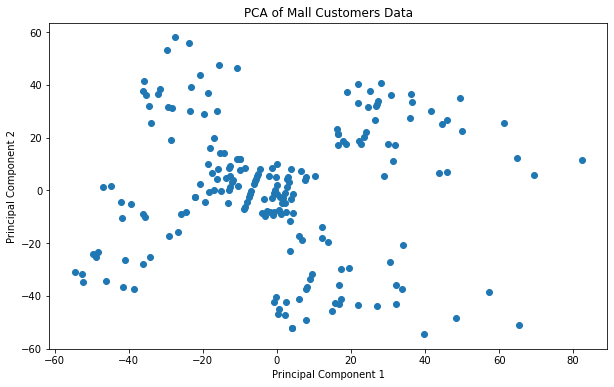

In [124]:
# Mengambil fitur yang akan digunakan untuk PCA
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Menerapkan PCA dengan jumlah komponen (n_components) yang diinginkan
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Membuat DataFrame baru yang berisi hasil PCA
pca_df = pd.DataFrame(features_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Menampilkan hasil PCA
print(pca_df.head())

# Visualisasi hasil PCA
plt.figure(figsize=(10, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.title('PCA of Mall Customers Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\Inge\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


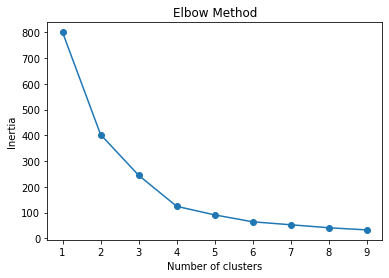

In [125]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_MallCus_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

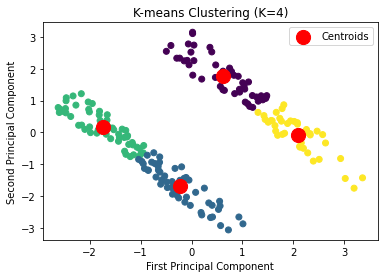

In [130]:
# Misalkan data_MallCus_PCA adalah data yang sudah di-transform dengan PCA
kmeans = KMeans(n_clusters=4, random_state=42).fit(data_MallCus_PCA)

# Visualisasi hasil klaster
plt.scatter(data_MallCus_PCA[:, 0], data_MallCus_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=200, c='red', label='Centroids')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={4})")

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [132]:
# Mengambil fitur yang akan digunakan (contoh: Annual Income dan Spending Score)
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Menentukan jumlah kluster yang diinginkan
num_clusters = 4

# Menerapkan K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

# Mendapatkan nilai centroid
centroids = kmeans.cluster_centers_

# Menampilkan nilai centroid
print("Nilai Centroid:")
print(pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

Nilai Centroid:
   Annual Income (k$)  Spending Score (1-100)
0           26.304348               20.913043
1           86.538462               82.128205
2           87.000000               18.631579
3           48.260000               56.480000


In [115]:
kmeans = KMeans(n_clusters=2)

In [116]:
kmeans.fit(X_std)

KMeans(n_clusters=2)

1. Algoritma K-Means mengelompokkan data dengan mencoba memisahkan sample ke dalam n kelompok dengan varian yang sama, meminimalkan kriteria, yang dikenal dengan inersia.
2. Inersia merupakan jumlah kuadrat dalam klaster.
3. Kita dapat melihat ada dimana centroid dari masing-masing cluster

In [117]:
kmeans.cluster_centers_

array([[-0.81102231, -0.04220977,  0.24178539, -0.75495496, -0.00924323],
       [ 0.89639308,  0.04665291, -0.26723649,  0.8344239 ,  0.0102162 ]])

# Inersia

1. Inersia bukan matriks yang dinormalkan
2. Semakin kecil nilai dari inersia maka cluster yang terbentuk akan semakin bagus, dan nilai nol merupakan titik optimal.
3. Akantetapi jika data kita berdimensi tinggi, maka inersia akan semakin tinggi juga hal ini karena jarak euclidian cenderung meningkat. hal ini sering dinamakan kutukan dimensi.
4. Salah satu solusinya yakni menerapkan dimensional reduction (PCA).

In [ ]:
kmeans.inertia_